In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [105]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [106]:
df = df.drop(columns=['Terjual/Belum'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    object
 9   Posisi Rumah                   308 non-null    object
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(5)
memory usage: 26.6+ KB


In [108]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [109]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

# EDA

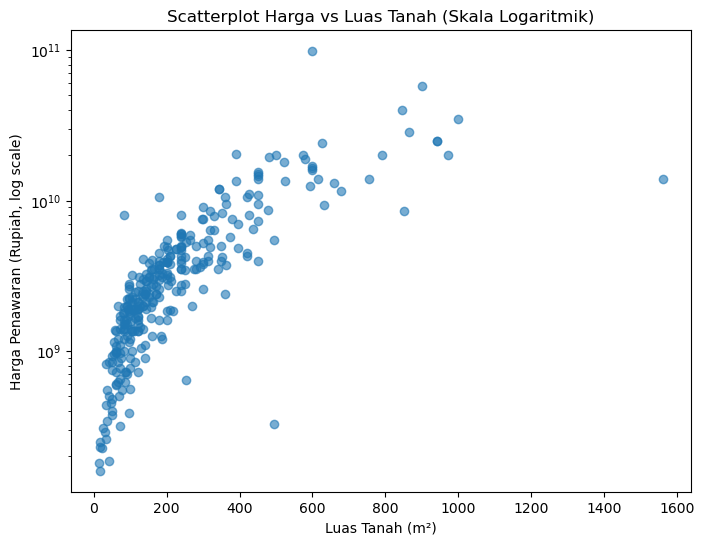

In [110]:
# Ubah kolom ke numerik
df['Harga Penawaran (dari Owner)'] = pd.to_numeric(df['Harga Penawaran (dari Owner)'], errors='coerce')
df['Luas Tanah (m2)'] = pd.to_numeric(df['Luas Tanah (m2)'], errors='coerce')

# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(df['Luas Tanah (m2)'], df['Harga Penawaran (dari Owner)'], alpha=0.6)
plt.yscale('log')  # Gunakan log scale
plt.title('Scatterplot Harga vs Luas Tanah (Skala Logaritmik)')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga Penawaran (Rupiah, log scale)')

plt.show()

dari scatterplot ini didapatkan jika semakin besar luas tanah maka akan semakin mahal juga harga rumah. kepadatan penawaran ada di 10⁸–10¹⁰ Rupiah (sekitar 100 juta – 10 miliar). menunjukkan rumah mayoritas adalah rumah menengah ke bawah hingga menengah keatas.

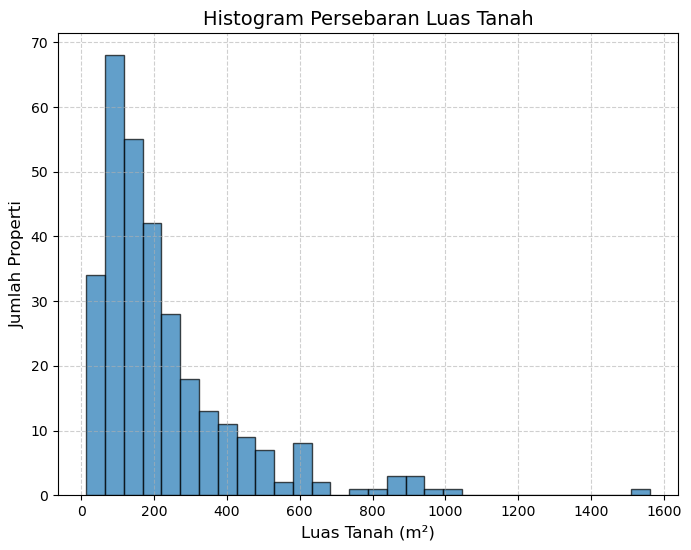

In [111]:
df['Luas Tanah (m2)'] = pd.to_numeric(df['Luas Tanah (m2)'], errors='coerce')

# --- 3. Buat histogram ---
plt.figure(figsize=(8,6))
plt.hist(df['Luas Tanah (m2)'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram Persebaran Luas Tanah', fontsize=14)
plt.xlabel('Luas Tanah (m²)', fontsize=12)
plt.ylabel('Jumlah Properti', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

dari histogram diatas didapatkan jika mayoritas rumah adalah rumah dengan rumah dengan luas tanah kecil ke menengah dan hanya ada sedikit rumah yang memiliki luas besar

# Data Preparation for Clustering

In [112]:
from sklearn.preprocessing import OrdinalEncoder
df_encoded = df.copy()

ordinal_cols = ['Lebar Jalan Depan Rumah (ROW)', 'Area Category']


ordinal_encoder = OrdinalEncoder(categories=[
    ['1-2 Mobil', '< 1 Mobil', '> 2 Mobil'],  
    ['Below Standard','Standard','Premium','Sangat Premium'] 
])

df_encoded[ordinal_cols] = ordinal_encoder.fit_transform(df_encoded[ordinal_cols])

nominal_cols = ['Nama Daerah','Arah Hadap Rumah','Posisi Rumah']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols]) 

encode_dict = {}

for col, cats in zip(nominal_cols,encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland ': 12,
                 'Citraland Golf Avenue': 13,
                 'Citraland Utara': 14,
                 'Darmahusada': 15,
                 'Darmo': 16,
                 'Darmo Permai': 17,
                 'Diponegoro': 18,
                 'Dukuh Pakis': 19,
                 'Dukuh Sutorejo': 20,
                 'Gading': 21,
                 'Gading Indah Regency': 22,
                 'Galaxy Bumi Permai': 23,
                 'Gayungan': 24,
                 'Gayungsari': 

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
167,1.0,122.0,250,300,5,3,2,2800000000,1.0,2.0,2.0
138,2.0,28.0,240,345,4,4,2,6000000000,1.0,2.0,0.0
64,1.0,40.0,84,140,4,2,2,1000000000,2.0,2.0,0.0
169,1.0,61.0,67,68,2,2,2,849000000,3.0,2.0,0.0
199,1.0,105.0,160,160,4,3,1,2100000000,3.0,2.0,0.0


In [113]:
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']
])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)'])
df_scaled.head()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Harga Penawaran (dari Owner)
0,0.064760,0.156529,-0.168161,-0.207847,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,-0.230696
4,0.610683,1.566201,0.441174,1.023247,-0.001723


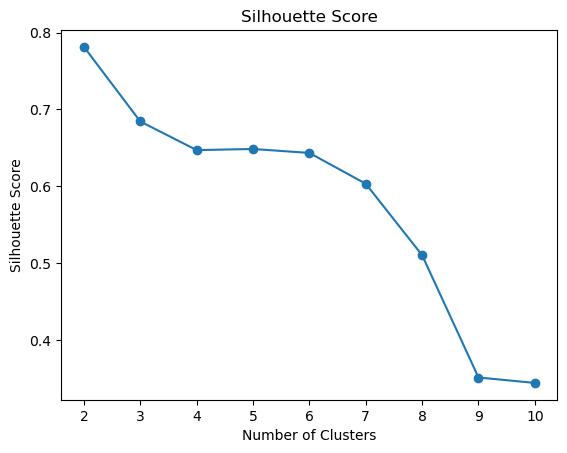

In [114]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


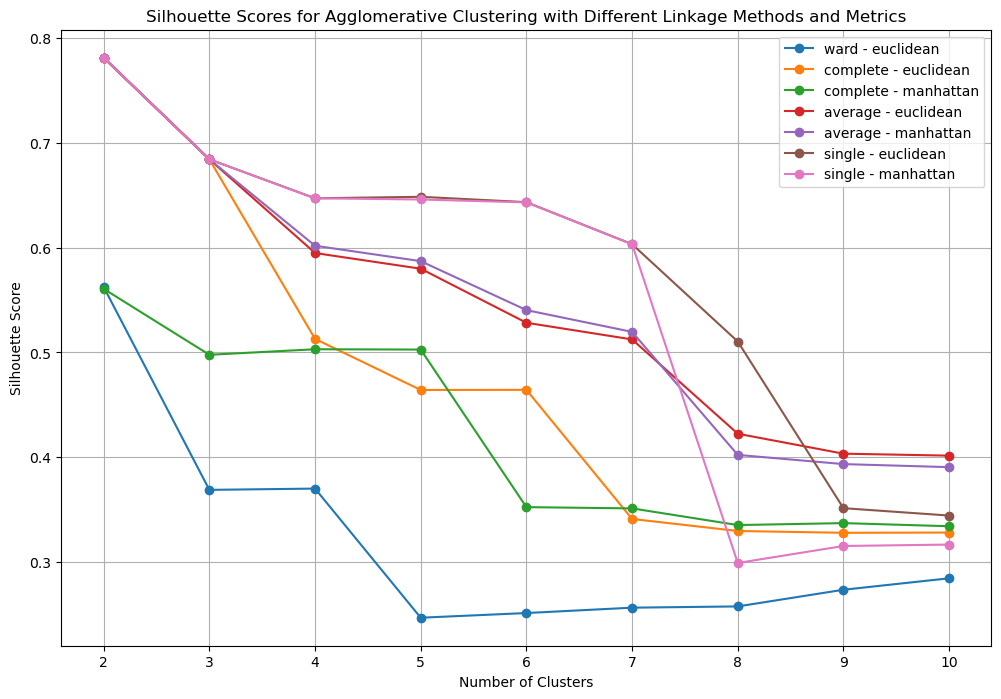

Best Silhouette Score: 0.7812569744904511
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [115]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

# Hierarchical Clustering Modeling

In [116]:
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [117]:
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7812569744904511


In [127]:
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc = agglo.fit_predict(df_scaled)

labels_model1 = agglo.fit_predict(df_scaled)

In [ ]:
# model2 = AgglomerativeClustering(
#     n_clusters=4,
#     linkage='ward',       
#     metric='euclidean'    
# )
# labels_model2 = model2.fit_predict(df_scaled)

In [128]:
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.5624353665605593


In [129]:
df_encoded['Agglo'] = y_hc

# Analyze the clusters with the original values
df_encoded.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,1.0,11.0,240,300,4,3,2,3500000000,3.0,2.0,0.0,0
1,0.0,100.0,30,60,2,1,2,287799000,3.0,2.0,1.0,0
2,1.0,48.0,170,170,5,4,2,2699999999,1.0,0.0,0.0,0
3,3.0,48.0,187,250,5,5,2,3100000000,3.0,2.0,0.0,0
4,2.0,48.0,350,600,5,5,2,5000000000,0.0,2.0,0.0,0


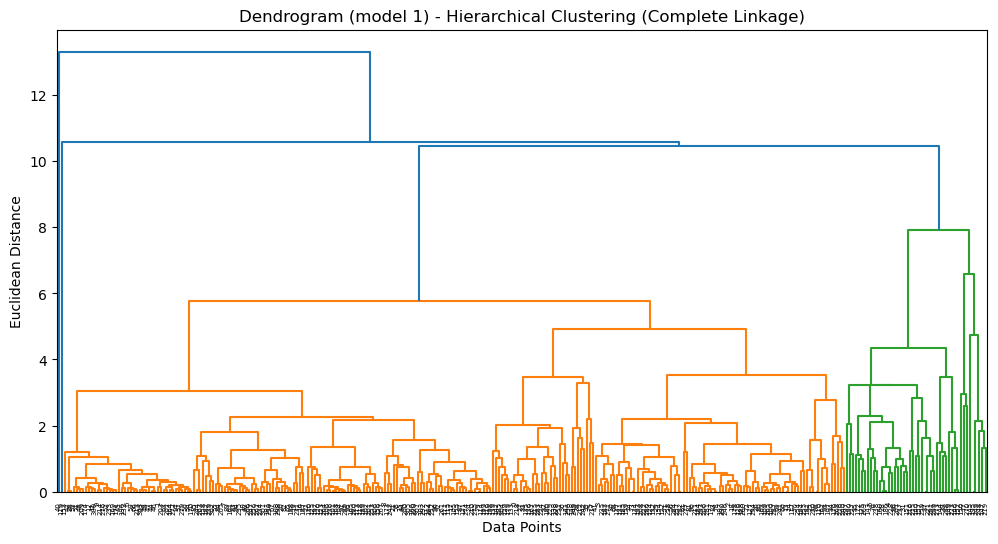

In [122]:
# Average Distance
linkage_matrix = linkage(df_scaled, method='complete', metric='euclidean')

# Visualisasi dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram (model 1) - Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

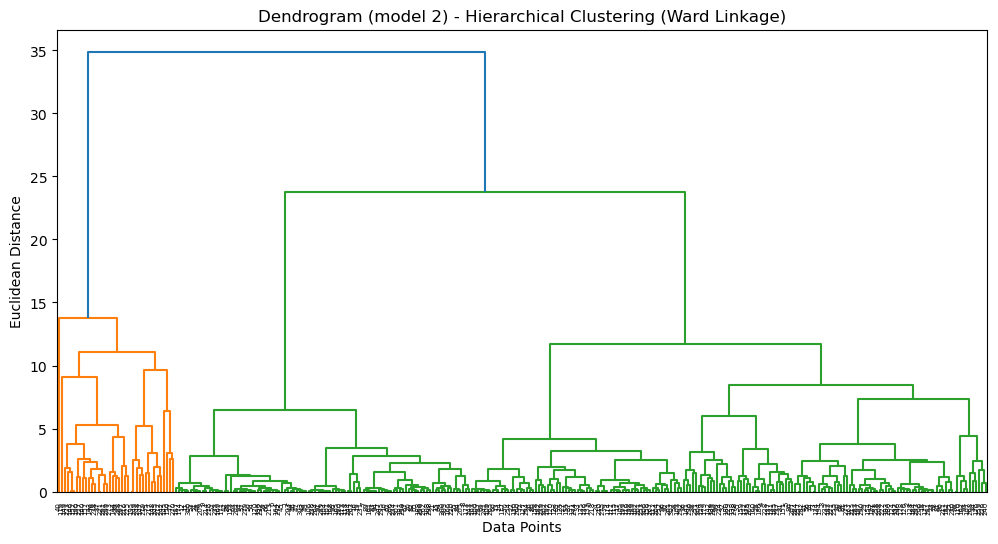

In [123]:
linkage_matrix_ward = linkage(df_scaled, method='ward')

# Visualisasi dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_ward)
plt.title('Dendrogram (model 2) - Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

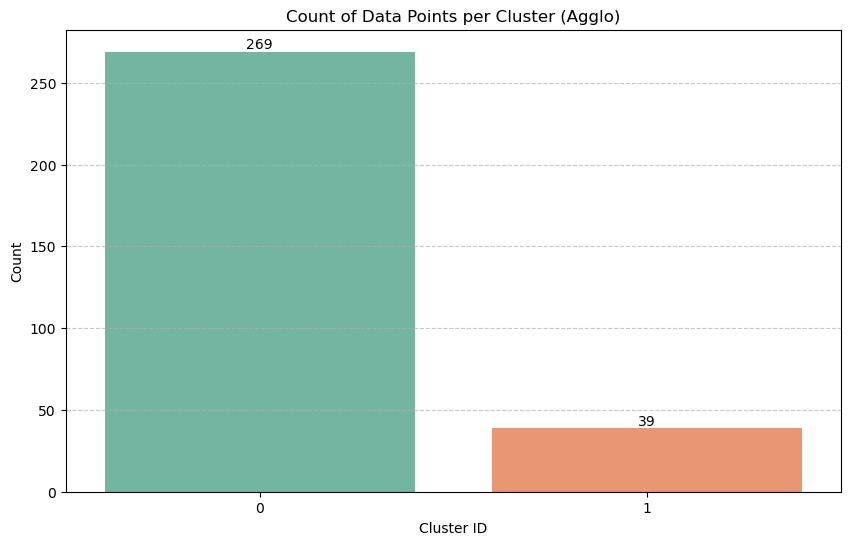

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_encoded['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [135]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah (m2)'
y_col = 'Luas Bangunan (m2)'
z_col = 'Harga Penawaran (dari Owner)'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_encoded['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

# Comparison & Interpretation

dari visualisasi didapatkan jika  kelompok 0 (harga menengah kebawa) sangat banyak dan lebih tertarik dengan rumah dengan harga rumah yang murah dan luas rumah yang kecil ke menengah dan hanya sedikit orang yang masuk ke kelompok 1  atau orangyang cukup berduit sehingga dapat membeli rumah dengan luas yang besar dan harga yang mahal

saran saya untuk orang muda yang baru saja bekerja atau sedang mencari rumah bisa mencari rumah dengan harga yang terjangkau 